## Resumo referente ao capitulo 3 de modulação AM

Aluno: Leonardo França da Cruz

Matricula: 202033940010

Turma: FEE2020

## Modulação em Amplitude

---


A modulação em amplitude, geralmente conhecida como modulação AM, consiste na modução da amplitude de um sinal com caracteristica senoidal, chamado de portadora, em função de um sinal desejado a ser transmitido.

Uma das principais justificativas para a realização de modulação de um sinal em telecomunicações está relacionado aos aspectos fisicos do dispositivo transmissor, dado que a geometria deste dispositivo é diretamente relacionada a frequência do sinal a ser transmitido. Deste modo, a modulação de sinais permite a transmição de informação em uma determida banda de frequência.

A modulação de sinais pode ser classificada em duas familias: modulação em amplitude e modulação em ângulo. Neste resumo será apresentado de forma simplicada e objetiva as principais estrategias de modulação AM, assim como as suas vantagens e desvantagens, pois como será demonstrado a utilização de modulação AM em telecomunições ao passo que simplifica a analise, cobra um custo auto em potência e aumenta a complexidade do sistema.

Primeiramente considerando uma onda senoidal portadora $c(t)$ definada por:

$$c(t) = A_ccos(2\pi f_ct)\tag{1}$$

Na qual $A_c$ representa a amplitude da portadora e $f_c$ corresponde a frequência da portadora.

A modulação em amplitude é formalmente definida como o processo pelo qual o valor médio da amplitude da onda portadora c(t) é variado linearmente com o sinal de mensagem m(t). Um sinal modulado em amplitude pode ser definido em função do tempo como:

$$s(t) = A_c[1 + K_am(t)]cos(2\pi f_ct) \tag{2}$$

$k_a$ é chamada de constante de sensibilidade de amplitude do modulador responsável pela geração do sinal modulado $s(t)$. A figura 1(a) mostra um tipico sinal mensagem $m(t)$ e as figuras  (b) e (c) monstram modulações Am para valores diferentes de $k_a$.

O envelope de $s(t)$ possui a mesma forma do sinal de mensagem $m(t)$, essa condição garante que a amplitude de $K_am(t)$ seja sempre menor que 1, para todo t. Deste modo a função $1 + K_am(t)$ será sempre positiva.

Quando $k_a$ é muito grande torma a relação $K_am(t) > 1$, a onda portadora se torna sobremodulada, oque resultando em inversões de fase da portadora sempre que o fator 1+ kam(t) cruzar o zero. A inversão de fase provoca distorção no no envelope, como mostrado na figura 1 (c).

Outro fator importante para que se tenha uma modulação satisfatoria é que a frequência da portado $f_c$ seja muito maior que a maior componente de frequência W do sinal mensagem $m(t)$.

É importante destacar também o como se comporta a modulação no dominio da frequência. Seja $m(t) ⇌M(f)$,  onde $M(f)$ é chamdo de espectro da mensagem. Assim podemos determinar o espectro AM $s(t)$ como:

$$S(f) = \cfrac{A_c}{2}[\delta(f-f_c)+\delta(f+f_c)]+\cfrac{k_aA_c}{2}[M(f-f_c)+M(f+f_c)]\tag{3}$$

Dado pelas seguintes relações:

$$cos(2\pi f_ct) = \cfrac{1}{2}[exp(j2\pi f_ct) + exp(-j2\pi f_ct)]\tag{4}$$

$$exp(j2\pi f_ct) ⇌ \delta(f-f_c)\tag{5}$$

$$m(t)exp(j2\pi f_ct) ⇌ M(f-f_c)\tag{6}$$




In [73]:

# EXEMPLO DE MODULAÇÃO AM

import numpy as np
import matplotlib.pyplot as plt

# frequência da portadora e do sinal mensagem
fc= 150
fm = 5
tm = 1/fm

# amplitudes da portadorea e da mensagem
Ac = 1
Am = 1

# tempo da simulação
fs = 5*fc
t = np.arange(0,1, 1/fs)

# definição da portadora e do sinal mensagem
ct = Ac*np.cos(2*np.pi*fc*t)
mt = Am*np.cos(2*np.pi*fm*t)


# fator de sensibilidade

mu = [0.9,1,2]
K = mu

st = np.array([(1+K*mt)*ct for K in mu])



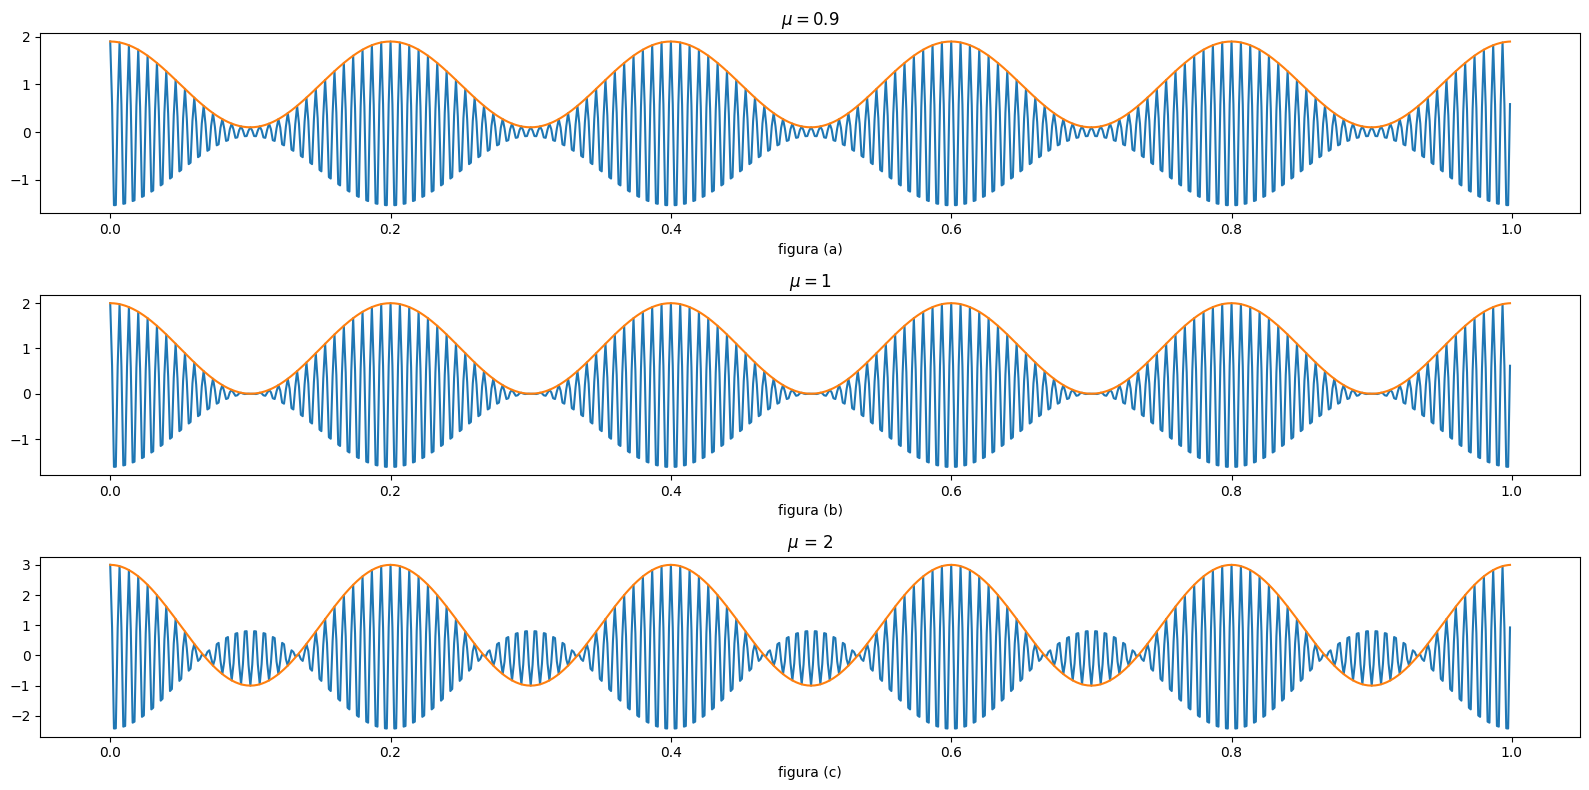

In [74]:
plt.figure(figsize=(16,8))

plt.subplot(3,1,1)
plt.plot(t, st[0])
plt.plot(t, mt*K[0]+1)
plt.title(r'$\mu = 0.9$')
plt.xlabel('figura (a)')
#plt.ylabel('Amplitude')

plt.subplot(3,1,2)
plt.plot(t,st[1])
plt.plot(t,mt*K[1]+1)
plt.title(r'$\mu = 1$')
plt.xlabel('figura (b)')

plt.subplot(3,1,3)
plt.plot(t,st[2])
plt.plot(t,mt*K[2]+1)
plt.title(r'$\mu$ = 2')
plt.xlabel('figura (c)')

plt.tight_layout()
plt.show()


Como podemos observar no grafico, o sinal mensagem está contido no envoltorio da onda modulada transmitida na figura (a), assim podemos facilmente recuperar a mensagem apartir de um detector de envelope. Para valores maiores de sensibilidade a onda portadora se torna sobremodulada, resultando na inversão de fase, assim como podemos ver na figura (c).

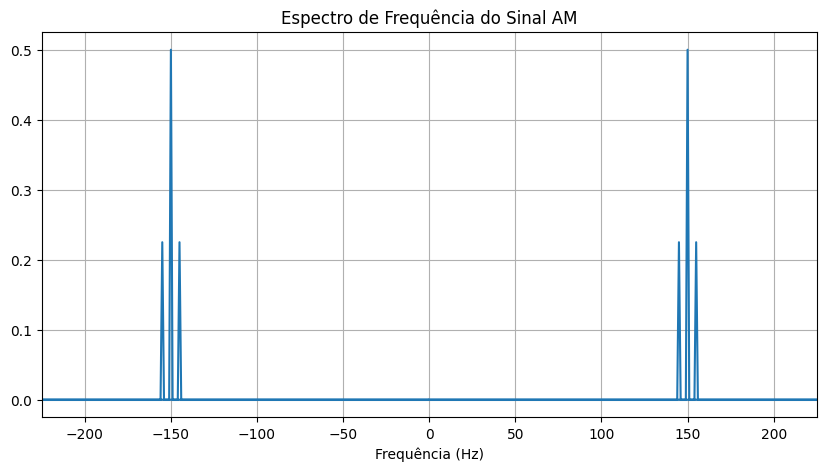

In [75]:

# Calcule o espectro de frequência usando a FFT
S = [np.fft.fft(x)/x.size for x in st]
freq = np.fft.fftfreq(st[0].size)*fs

# Plot do espectro de frequência
plt.figure(figsize=(10,5))
plt.plot(freq, np.abs(S[0]))
plt.title('Espectro de Frequência do Sinal AM')
plt.xlabel('Frequência (Hz)')
plt.xlim([-1.5*fc,1.5*fc])
plt.grid()



Podemos ver no espectro em frequência a onda portadora e as bandas laterais. As
informações do sinal mensagem está contida nas bandas laterais e a presença da portadora facilitará a
demodulação. Contudo, fica claro como potência é desperdiçada, pois boa parte do
espectro é ocupado pela portadora.

# Detector de Envelope
---
O detector de envelope se trata de um dispositivo cuja a função é entregar na sua saida o envelope de uma onda AM que é recebido na sua entrada. Estes dispositivos são utilizados na demodulação de ondas AM. O detector de evelope é uma estrategia altamente eficaz para realizar essa tarefa, desde que siga as seguintes condições:



1.   A onda AM é faixa estreita, o que significa que a frequência da portadora é grande quando comparada com a largura de faixa da mensagem.
2.   O percentual de modulação da onda AM é menor do que 100%.


O circuito detector de envelope é basicamente um circuito retificador, onde é composto por um diodo e um filtro RC. No semi-ciclo positivo do sinal de entrada, o diodo será diretamente polarizado e conduzira o sinal, o capacitor C armazenará energia rapidamente até atigir o valor de pico do sinal de entrada. Para o semi-ciclo negativo o diodo ficara reversamente polarizado e o capacitor C se descarregara na carga $R_l$, esse processo se mantem até o proximo semi-ciclo positivo.

A constante de tempo de descarga de $R_lC$ deve ser grande o suficiente para garantir que o capacitor se descarregue lentamente na carga entre os picos positivos da onda portadora, mas não deve ser tão grande a ponto da tensão do capacitor não diminnua a maxima taxa de variação da onda modulante.

$$\cfrac{1}{f_c}<<R_lC<<\cfrac{1}{W}\tag{7}$$

O resultado é que a tensão do capacitor, ou a
saída do detector, é aproximadamente a mesma do envelope da onda AM.




In [76]:
# Detector de envelope para uma onda modulada com fator K = 0.9

st1 =(1+0.9*mt)*ct

from scipy.signal import find_peaks
# Primeiramente encontrar os valores de pico do sinal modulado
pico, _ = find_peaks(st1)
# Tempo correspondente aos picos
t_picos = t[pico]
# Valores dos picos
v_picos = st1[pico]

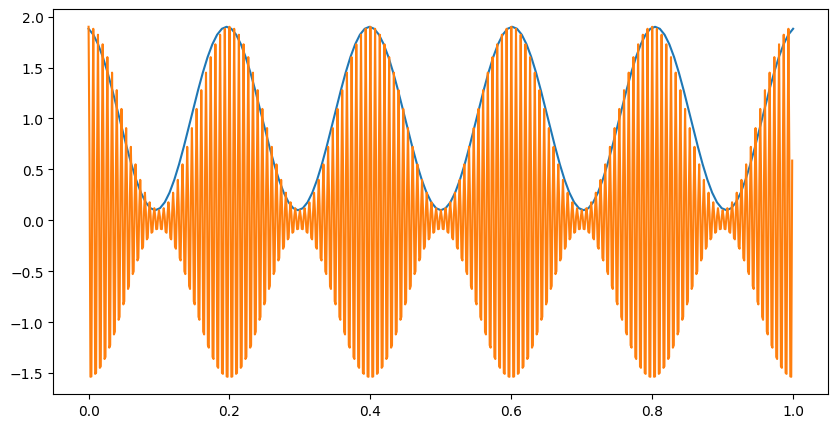

In [77]:
#descobrir o tamanho do vetor de picos
a = len(v_picos)
t1  = np.linspace(0,1,a)
plt.figure(figsize=(10,5))
plt.plot(t1,v_picos)
plt.plot(t,st1)

# Vantagens e Desvatagens da Modulação AM
---
A principal vantagem da modulação em amplitude é a facilidade com que ela é gerada e também simplicidade aplicada para a sua demodulação, podendo ser feita por um circuito retficador. Porém como em comunicações potência transmitida e largura de faixa do canal são os principais recursos a serem explorados, a modulação AM acaba não sendo eficiente.

A modulação AM desperdiça potência transmitida pois a onda portadora $c(t)$ é independente do sinal $m(t)$, nesse sentido a transmissão da onda portadora acaba gerando um desperdicio de potência, assim somente uma fração da potência total trasmitida é afetada por $m(t)$.

Outro ponto negativo da modulação AM é o fato dela desperdiçar a largura de faixa do canal, pois para ser feita a modulação ela requer uma faixa de transmissão igual a duas vezes a largura de faixa da mensagem.

# Modulação de Faixa Lateral Dupla - (DSB-SC)
---

A modulação de faixa lateral dupla consiste basicamente no produto do sinal mensagem $m(t)$ pela onda portadora $c(t)$.

$$s(t) = c(t)m(t)\tag{8}$$
$$s(t)=A_ccos(2\pi f_ct)m(t)\tag{9}$$

Este tipo de modulação também é conhecida como modulação de produto e por esse fato quando o sinal mensagem é desligado a modulação é reduzida a zero.

Outro ponto inportante é que nesse tipo de modulação o sinal $s(t)$ sofre inversão de fase sempre que $m(t)$ cruza o zero. Portanto o envelope do sinla DSBB_SC não pode ser demodulado usando um simples detector de envelope.

A modulação DSB-SC necessita da mesma largura de faixa da modulação AM, 2W. Assim a sua maior vantagem está no fato dessa modulação salvar a potência transmitida, oque pode ser um fator decisivo para quem for escolher uma estrategida de modulção.

# Detector Coerente

Como foi falado anteriormente o envelope da onda modudala DSB-SC é diferente do sinal mensagem $m(t)$, para recuperar essa mensagem precisamos de outra estrategia. Dada a identidade trigonometrica:

$$cos^2(θ) = \frac{1}{2}+\cfrac{1}{2}cos(2\theta)\tag{10}$$

considerando para $\theta = 2\pi f_ct$, podemos recuperar o sinal $m(t)$ multiplicando primeiramente $s(t)$ por uma onda senoidal gerada localmente e, então, filtrando o produto com um filto passa-baixa. . Este método de demodulação é chamado de detecção coerente ou demodulação síncrona.

Para um caso mais geral, podemos representar o sinal oscilador local por $A'_ccos(2\pi f_ct+\phi)$ e usando (9) para a onda DSB-SC, temos a seguinte saida do modulador de produto.

$$v(t) = A'_ccos(2\pi f_ct+\phi)s(t)$$
$$v(t) = A_cA'_ccos(2\pi f_ct)cos(2\pi f_ct+\phi)m(t)$$
$$v(t) = \cfrac{1}{2}A_cA'_ccos(4\pi f_ct+\phi)m(t) + \cfrac{1}{2}A_cA'_ccos(\phi)m(t)\tag{11}$$

O primeiro termo de (10) representa um novo sinal modulado DSB-SC com frequência de portador $2f_c$, enquanto que o segundo termo é proporcional ao sinal de
mensagem $m(t)$. O primeiro termo da equação é removido pelo filtro passa-baixa, desde que a frequência de corte deste filtro seja maior que W mas menor do que $2f_c -W$. na saida do filtro obtemos:

$$v_0(t) = \cfrac{1}{2}A_cA'_ccos(\phi)m(t)\tag{12}$$

<br>

<center><img src = "dec_coerente.drawio (1).png" alt = "aa" />
<center>
  <em> Figura 1 -</em> Diagrama em blocos
do detector coerente.
</center>

 A complexidade resultante do sistema é o preço que deve ser pago pela supressão da onda portadora para salvar a potência transmitida.

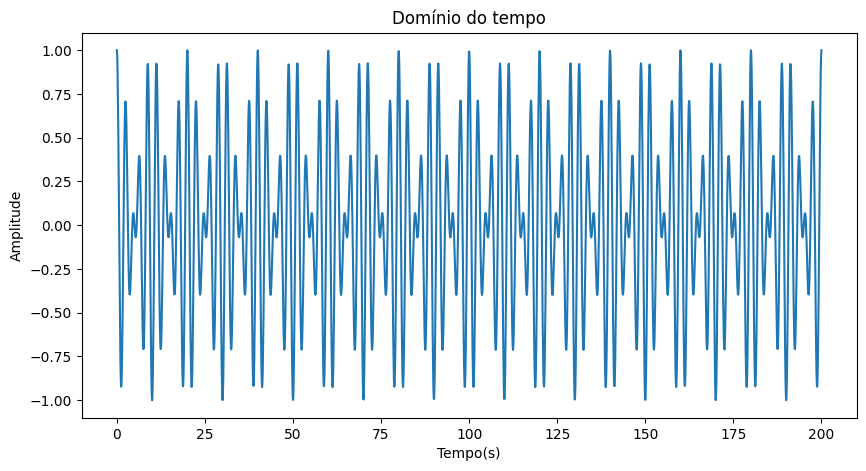

In [78]:
# EXEMPLO DE MODULAÇÃO DSB-SC
Ac2 = 1
fc2 = 0.4
fm2 = 0.05
t3 = np.linspace(0,200,2000)
mt3 = Ac2*np.cos(2*np.pi*fm2*t3)
ct3 = Ac2*np.cos(2*np.pi*fc2*t3)
dsb = mt3*ct3
plt.figure(figsize=(10,5))
plt.plot(t3,dsb)
plt.title('Domínio do tempo')
plt.xlabel('Tempo(s)')
plt.ylabel('Amplitude')
plt.show()

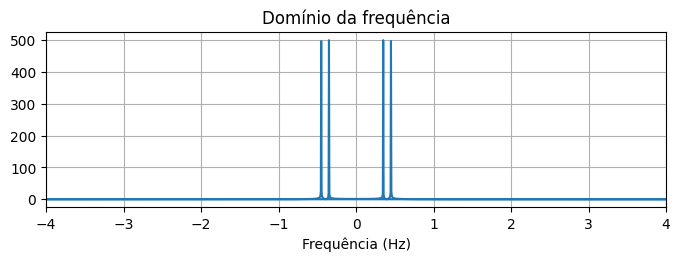

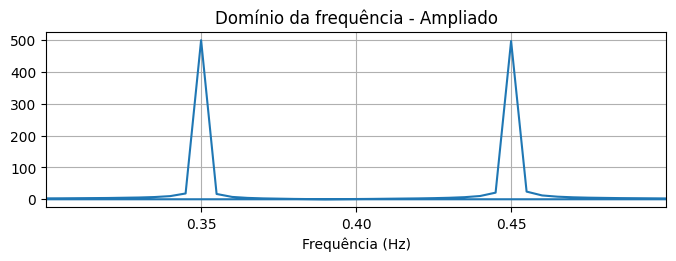

In [79]:

# Calcule o espectro de frequência usando a FFT
DSB = np.fft.fft(dsb)
freq1 = np.fft.fftfreq(dsb.size)*10


# Plot do espectro de frequência
plt.figure(figsize=(8,5))
plt.subplot(2,1,1)
plt.plot(freq1, np.abs(DSB))
plt.xlim(-4,4)
plt.title('Domínio da frequência')
plt.xlabel('Frequência (Hz)')
plt.grid()

plt.figure(figsize=(8,5))
plt.subplot(2,1,2)
plt.plot(freq1, np.abs(DSB))
plt.title('Domínio da frequência - Ampliado')
plt.xlabel('Frequência (Hz)')
plt.xticks([fc2-fm2,fc2,fm2+fc2])
plt.xlim(0.3, 0.5)
plt.grid()


Podemos observar nos graficos no dominio da frequência, que a portadora esta suprimida e que as suas duas faixas laterais superiores e inferiores estão localizadas em $\pm 0.45Hz$ e $\pm 0.35Hz$

Para o detector coerente, precisamos primeiramente multipplicar o sinal modulado por uma copia identica do sinal da portadora e depois passar esse produto por um filtro passa baixa.

In [80]:
from scipy.signal import butter, lfilter

def butter_lowpass_filter(data, cutoff_frequency, sampling_rate, order=4):
    nyquist = 0.5 * sampling_rate
    normal_cutoff = cutoff_frequency / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    y = filtfilt(b, a, data)
    return y


# Primeiramente multiplicamos o sinal modulado pela portadora

dm = dsb*ct3

# Filtro passa-baixa 
freq_corte = 50
fs = 2000
sinal_filt = butter_lowpass_filter(dm, freq_corte, fs, order=4)

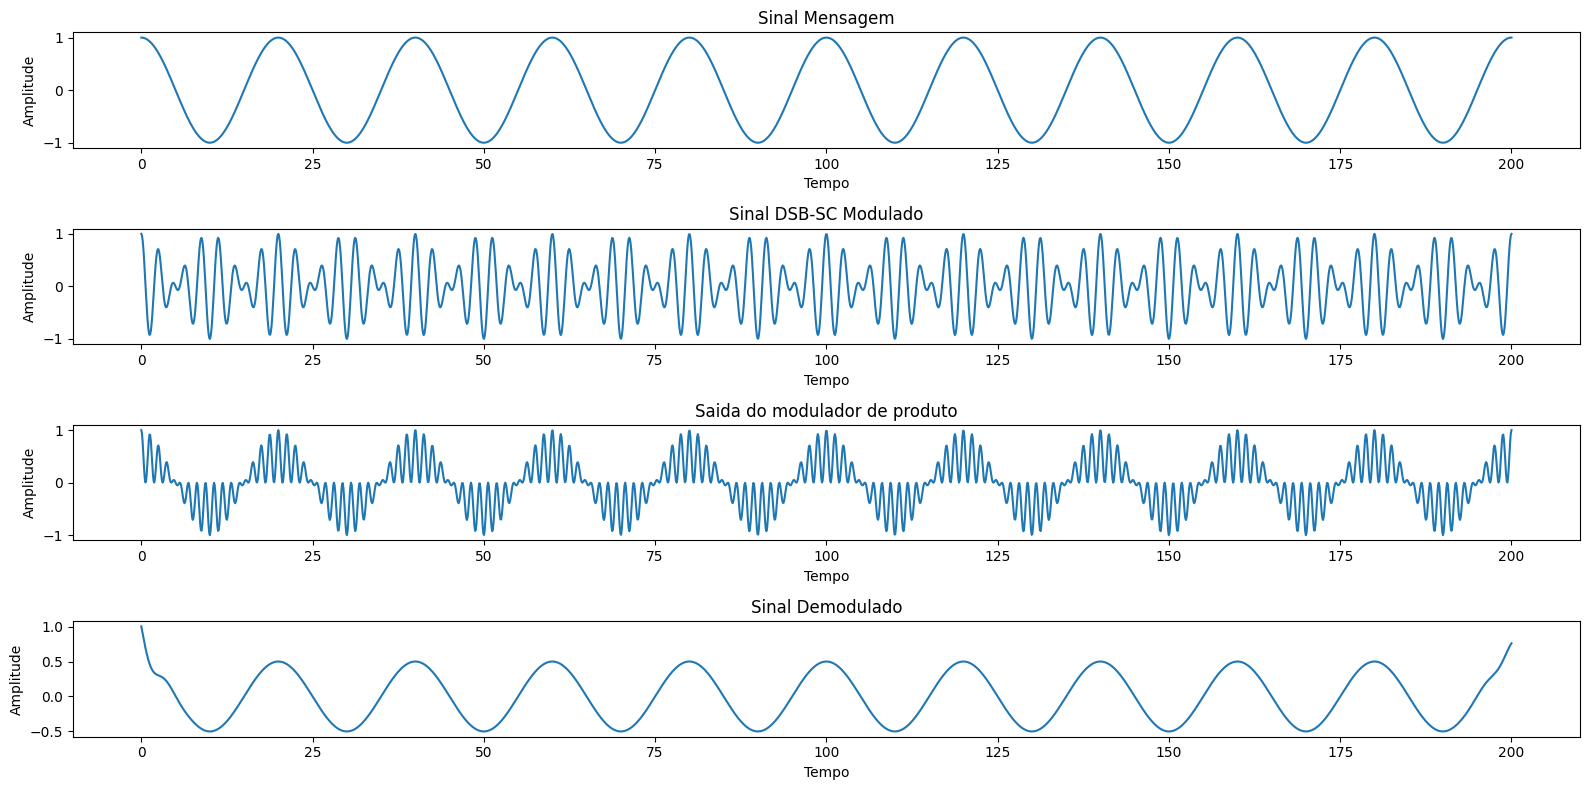

In [81]:

# Plotagem dos sinais
plt.figure(figsize=(16,8))

plt.subplot(4, 1, 1)
plt.plot(t3, mt3)
plt.title('Sinal Mensagem')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')

plt.subplot(4, 1, 2)
plt.plot(t3, dsb)
plt.title('Sinal DSB-SC Modulado')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')

plt.subplot(4,1,3)
plt.plot(t3,dm)
plt.title('Saida do modulador de produto')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')

plt.subplot(4, 1, 4)
plt.plot(t3, sinal_filt)
plt.title('Sinal Demodulado')
plt.xlabel('Tempo')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


# Modulação de Faixa Lateral Única - SSB
---
Com a Modulação DSB-SC somos capazes de contornar o problema do desperdicio de potência da modulação AM convencional, mas ainda assim precisamos de duas faixas laterias de onda modulada. Para resolver esse outro problema tem-se a modulação por faixa lateral única (SSB), que utiliza a faixa infeiror ou a faixa superior para a transmissão de um sinal.

Para simplificar a analise, iremos considerar primeiramente um modulador DSB-SC que ultiza uma onda modulante senoidal para depois generalizar para qualquer tipo de sinal.

$$m(t) = A_mcos(2\pi f_mt)$$

Dado a portadora $c(t) = A_ccos(2\pi f_ct)$ a onda modudalada é dada por $S_{DSB}(t) = c(t)m(t) $

Assim:

$$S_{DSB}(t) = \cfrac{1}{2}A_cA_mcos[2\pi (f_c +f_m)t] + \cfrac{1}{2}A_c A_m cos[2\pi (f_c-f_m)t] \tag{13}$$

Como podemos observar a moudulação tem duas frequêcias laterais, uma superior $(f_c+f_m)$ e outra inferior $(f_c-f_m)$. Para uma modulação SSB superior teremos a seguinte equação

$$S_{SSB_{superior}}(t) = \cfrac{1}{2}A_cA_mcos[2\pi (f_c +f_m)t] $$

Abrindo o argumento do cosseno usando identidade trigonometrica, temos:

$$S_{SSB_{superior}}(t)= \cfrac{1}{2}A_cA_mcos(2 \pi f_ct)cos(2\pi f_mt) -\cfrac{1}{2}A_cA_mseno(2 \pi f_ct)seno(2\pi f_mt) $$

A mesma identidade pode ser aplicada para a faixa inferior, assim a modulção SSB pode ser expressa como:

$$S_{SSB}(t)= \cfrac{1}{2}A_cA_mcos(2 \pi f_ct)cos(2\pi f_mt) \pm \cfrac{1}{2}A_cA_mseno(2 \pi f_ct)seno(2\pi f_mt) \tag{14}$$


Para generalizar a equção da modulção SSB aplicamos um sinal mensagem periodico definido pela Série de fourier

$$m(t) = \sum_na_n cos(2 \pi f_nt)$$

Substituindo:

$$S_{SSB}(t)= \cfrac{1}{2}A_ccos(2 \pi f_ct)\sum_na_n cos(2 \pi f_nt) \pm \cfrac{1}{2}A_cseno(2 \pi f_ct)\sum_na_n seno(2 \pi f_n t) $$

Agora para um outro sinal periodico definido pela serie de fourier:

$$\hat{m}(t) = \sum_na_n seno(2 \pi f_nt)$$

Substituindo novamente:

$$S_{SSB}(t) = \cfrac{A_c}{2}m(t)cos(2\pi fct) \mp \cfrac{A_c}{2}\hat{m}(t)seno(2\pi f_ct)\tag{15}$$

Comparando as duas equações, obtemos o sinal $\hat{m}(t)$ apenas deslocando o cosseno por -90°. O sinal $\hat{m}(t)$ é a transformada de Hilbert do sinal $m(t)$, basicamente a transformada de Hilbert é um sinal cuja funçã de transformada é definida por:

$$H(f) = -jsgn(f)$$

Na qual $sgn(f)$ é a função sinal. A transformação de Hilbert é um deslocador de fase de faixa largam cuja resposta em frequência é caracterizada por duas partes.

  1. A resposta em amplitude é unitaria para todas as frequências, tanto positivas quanto negativas.
  2. A respota em fase é +90° para frequências negativas e -90° para frequências positivas.

Desta forma, dado um sinal de mensagem $m(t)$ possivel de ser transformado por Forrier, com sua transformada de Hilbert definada por $\hat{m}(t)$, a onda modulada SSB produzida por $m(t)$ é dada por:

$$s(t) = \cfrac{A_c}{2}m(t)cos(2\pi f_ct) \mp \cfrac{A_c}{2}\hat{m}(t)seno(2\pi f_ct)\tag{16}$$

<br>

<center><img src = "SSB.png" alt = "aa" />
<center>
  <em> Figura 2 -</em> Esquema para modulação SSB.
</center>

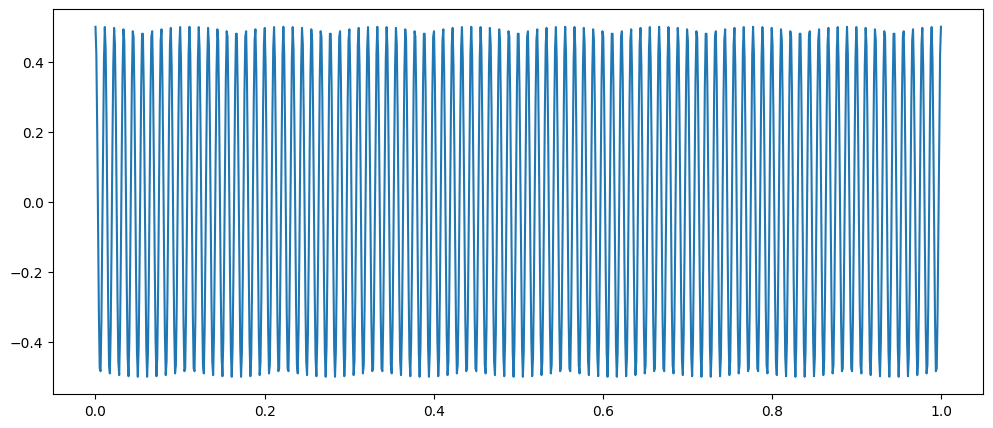

In [82]:
# EXEMPLO DE MODULAÇÃO SSB

fc1 = 100
fm1 = 10
Ac1 = 1
Am1 = Ac1
fs1 = 10*fc1
t2 = np.linspace(0,1,fs1)

ssb_inf = (1/2)*Ac1*Am1*np.cos(2*np.pi*fc1*t2)*np.cos(2*np.pi*fm1*t2) + (1/2)*Ac1*Am1*np.sin(2*np.pi*fc1*t2)*np.sin(2*np.pi*fm1*t2)

plt.figure(figsize=(12,5))
plt.plot(t2,ssb_inf)

O metodo utilizado para a produção da modulação SSB, foi o metodo de discriminação em fase, que é obtida da descrição no dominio do tempo da onda SSB definida em (14).

(-1.3, 1.3)

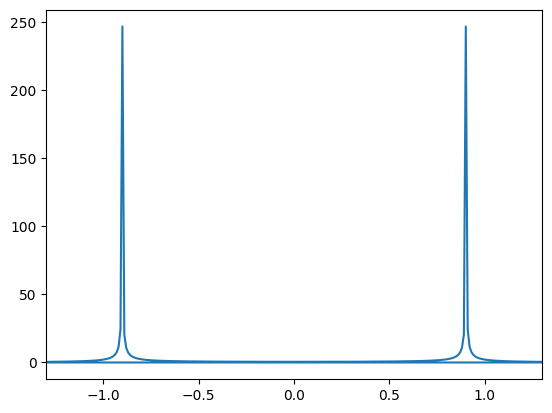

In [83]:
# Dominio da frequência

SSB = np.fft.fft(ssb_inf)
freq1 = np.fft.fftfreq(ssb_inf.size)*10

plt.plot(freq1,np.abs(SSB))
plt.xlim(-1.3,1.3)